# **0.Importing the Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# **1. Data Loading**

In [ ]:
folder_url = "https://drive.google.com/drive/folders/14uOYx6cGSnhHWj9FW95LgUyqQLIRJgNl"
output_dir = "/content/datasets"
os.makedirs(output_dir, exist_ok=True)

!gdown --folder {folder_url} -O {output_dir}

files = os.listdir(output_dir)
print("Files downloaded successfully:")
print(files)

Retrieving folder contents
Processing file 1snjCkus-L3Y71MVO2mueh9wBrp3WOfz7 Coustmer Credit Info.csv
Processing file 1pLiEx4GE3Eqtc1sgPwgO_5DKcDYdkCVl Coustmers Data.csv
Processing file 1F1QnwUg-HzkVoKVxrBBlOtIlLGY_L0G0 Credit Score.csv
Processing file 16EAJVUwr4yN5JaTdqDnI-AKKdMYq0UeT loans Recovery.csv
Processing file 1sk0VC6yrzLEdrpnQCWpbtXeNTY9uTH3C Transactions.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1snjCkus-L3Y71MVO2mueh9wBrp3WOfz7
To: /content/datasets/Coustmer Credit Info.csv
100% 1.39M/1.39M [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pLiEx4GE3Eqtc1sgPwgO_5DKcDYdkCVl
To: /content/datasets/Coustmers Data.csv
100% 5.83M/5.83M [00:00<00:00, 39.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F1QnwUg-HzkVoKVxrBBlOtIlLGY_L0G0
To: /content/datasets/Credit Score.csv
100% 562k/562k [00:00<00:00, 135MB/s]
Downloading...
Fr

In [ ]:
file_name = 'Coustmer Credit Info.csv'
file_path = os.path.join(output_dir, file_name)
df_credit_info = pd.read_csv(file_path)

print(f"Dataset: {file_name}")
display(df_credit_info.head())

Dataset: Coustmer Credit Info.csv


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
print("="*80)
print(f"Dataset Summary: Coustmer Credit Info.csv")
print("-"*80)
df_credit_info.info()

Dataset Summary: Coustmer Credit Info.csv
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                           

# **1.1 Exploratory Data Analysis (EDA) for `df_credit_info`**

### Descriptive Statistics for Numerical Features

In [ ]:
print('Descriptive Statistics for Numerical Features:')
display(df_credit_info.describe())

Descriptive Statistics for Numerical Features:


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loanProbability,Loan
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.417076,0.410981
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.143223,0.492036
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.070773,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.313943,0.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.403787,0.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.508189,1.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.951333,1.000000


### Unique Values and Value Counts for Categorical Features

In [ ]:
categorical_cols = df_credit_info.select_dtypes(include='object').columns

print('Unique Values and Value Counts for Categorical Features:')
for col in categorical_cols:
    print(f"\n--- {col} ---")
    display(df_credit_info[col].value_counts())

Unique Values and Value Counts for Categorical Features:

--- Attrition_Flag ---


,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627



--- Gender ---


,count
Gender,
F,5358
M,4769



--- Education_Level ---


,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451



--- Marital_Status ---


,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748



--- Income_Category ---


,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727



--- Card_Category ---


,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


# **2. Data cleaning**

In [ ]:
df_credit_info = pd.read_csv('/content/datasets/Coustmer Credit Info.csv')

df_credit_info = df_credit_info.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], errors='ignore')

print("\nCredit Info Data cleaned successfully")
df_credit_info.info()
display(df_credit_info.head())


Credit Info Data cleaned successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit          

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
cleaned_dir = "/content/cleaned_datasets"
os.makedirs(cleaned_dir, exist_ok=True)

df_credit_info.to_csv(f"{cleaned_dir}/credit_info_cleaned.csv", index=False)

print("\nAll cleaned dataset saved in:", cleaned_dir)


All cleaned dataset saved in: /content/cleaned_datasets


# **3. Generating Loan Output**

In [ ]:
df = df_credit_info

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df['loanProbability']=0
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loanProbability
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loanProbability
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.0
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.0
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.0
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.0
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.0
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.0
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.0


In [ ]:
avgCardLimit = df.groupby('Card_Category')['Credit_Limit'].mean()
avgCardLimit

,Credit_Limit
Card_Category,
Blue,7363.780002
Gold,28416.370690
Platinum,30283.450000
Silver,25277.836036


In [ ]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
df['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1])

In [ ]:
def genProbability(row):
  p=0
  #by dependants
  if row['Dependent_count']==0:
    p+=np.random.uniform(0.02, 0.03)
  elif row['Dependent_count']==1:
    p+=np.random.uniform(0.01, 0.02)
  elif row['Dependent_count']==2:
    p+=np.random.uniform(0.005, 0.01)
  else:
    pass
  #by relationship count, more products= more loyalty to the bank
  p+=row['Total_Relationship_Count']*0.05
  #by age, most banks are more likely to give loans to age range 40-60
  if row['Customer_Age']<26:
    pass
  elif row['Customer_Age']>26 and row['Customer_Age']<40:
    p+=np.random.uniform(0.02, 0.07)
  elif row['Customer_Age']>40 and row['Customer_Age']<60:
    p+=np.random.uniform(0.07, 0.12)
  else:
    p+=np.random.uniform(0.01, 0.03)
  #now by income ability
  if row['Income_Category']=='Less than $40K':
    pass
  elif row['Income_Category']=='$40K - $60K':
    p+=np.random.uniform(0.02,0.04)
  elif row['Income_Category']=='$60K - $80K':
    p+=np.random.uniform(0.05,0.07)
  elif row['Income_Category']=='$80K - $120K':
    p+=np.random.uniform(0.08,0.1)
  elif row['Income_Category']=='$120K+':
    p+=np.random.uniform(0.1,0.12)

  #now by credit card limit
  if row['Credit_Limit'] > 1.3*avgCardLimit[row['Card_Category']]:
    p+=np.random.uniform(0.15,0.25)
  elif row['Credit_Limit'] > 1.2*avgCardLimit[row['Card_Category']]:
    p+=np.random.uniform(0.07,0.12)
  elif row['Credit_Limit'] > 1.1*avgCardLimit[row['Card_Category']]:
    p+=np.random.uniform(0.02,0.07)

  #marital status: if ur married then ur more likely to get a loan
  if row['Marital_Status']=='Married':
    p+=np.random.uniform(0.05,0.09)
  #education level, self explanatory.
  if row['Education_Level']=='High School':
    p+=np.random.uniform(0.03, 0.05)
  elif row['Education_Level']=='College':
    p+=np.random.uniform(0.05, 0.1)
  elif row['Education_Level']=='Post-Graduate':
    p+=np.random.uniform(0.1, 0.16)
  elif row['Education_Level']=='Doctorate':
    p+=np.random.uniform(0.1, 0.2)

  return min(p,1)

In [ ]:
df['loanProbability'] = df.apply(genProbability, axis=1)

In [ ]:
df['loanProbability'].mean()

np.float64(0.41707576397593926)

In [ ]:
#since the output must be binary(0 or 1) we'll use a Bernoulli (bianomial n=1) draw
df['Loan'] = np.random.binomial(n=1, p=df['loanProbability'])

In [ ]:
df['Loan'].sum()

np.int64(4162)

In [ ]:
#Saving the most important sheet to apply analysis on
df.to_csv('creditInfoFINAL.csv', index=False)


# **4. Machine Learning with KNN & Logistic Regression**

**1. KNN (with Cross-Validation)**

In [ ]:
dfCat = ["Income_Category", "Education_Level", "Marital_Status", "Card_Category"]

In [ ]:
dfNum = ["Credit_Limit","Customer_Age","Dependent_count", "Total_Relationship_Count"]

In [ ]:
Loan = "Loan"

In [ ]:
df = df[dfCat + dfNum + [Loan]]
df.head()

,Income_Category,Education_Level,Marital_Status,Card_Category,Credit_Limit,Customer_Age,Dependent_count,Total_Relationship_Count,Loan
0,$60K - $80K,High School,Married,Blue,12691.0,45,3,5,1
1,Less than $40K,Graduate,Single,Blue,8256.0,49,5,6,0
2,$80K - $120K,Graduate,Married,Blue,3418.0,51,3,4,1
3,Less than $40K,High School,Unknown,Blue,3313.0,40,4,3,1
4,$60K - $80K,Uneducated,Married,Blue,4716.0,40,3,5,0


In [ ]:
df_encoded = pd.get_dummies(df, columns=dfCat, drop_first=True)
X = df_encoded.drop('Loan', axis=1)
y = df_encoded['Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(knn, X, y, cv=cv)
accuracy = scores.mean()
error_rate = 1 - accuracy
print("Cross-Validation Accuracy:", accuracy)
print("Cross-Validation Error Rate:", error_rate)

Cross-Validation Accuracy: 0.5676916139568327
Cross-Validation Error Rate: 0.43230838604316735


In [ ]:
y_pred = knn.predict(X_test_scaled)
knn_test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", knn_test_accuracy)


Test Accuracy: 0.5760118460019743


using KNN The Cross-Validation Accuracy is 56.8% and the Test Accuracy is 57.6%

**2. Logistic Regression**

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv)
logreg_accuracy = logreg_scores.mean()
logreg_error_rate = 1 - logreg_accuracy
print("Logistic Regression Cross-Validation Accuracy:", logreg_accuracy)
print("Logistic Regression Cross-Validation Error Rate:", logreg_error_rate)

Logistic Regression Cross-Validation Accuracy: 0.6185652813002186
Logistic Regression Cross-Validation Error Rate: 0.3814347186997814


In [ ]:
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_test_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Test Accuracy:", logreg_test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Test Accuracy: 0.631786771964462
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73      1208
           1       0.58      0.33      0.42       818

    accuracy                           0.63      2026
   macro avg       0.61      0.58      0.58      2026
weighted avg       0.62      0.63      0.61      2026



# **5. Model Comparison**

In [ ]:
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {logreg_test_accuracy:.4f}")

KNN Test Accuracy: 0.5760
Logistic Regression Test Accuracy: 0.6318


In [ ]:
if knn_test_accuracy > logreg_test_accuracy:
    print("KNN performs better on this dataset")
elif logreg_test_accuracy > knn_test_accuracy:
    print("Logistic Regression performs better on this dataset")
else:
    print("Both models perform equally well")

Logistic Regression performs better on this dataset


In [ ]:
print("\n Logistic Regression Feature Importance")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(logreg.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Top 10 Most Important Features:")
print(feature_importance.head(10))


 Logistic Regression Feature Importance
Top 10 Most Important Features:
                          feature  importance
3        Total_Relationship_Count    0.303837
0                    Credit_Limit    0.299947
6    Income_Category_$80K - $120K    0.151557
15         Marital_Status_Married    0.135331
20           Card_Category_Silver    0.119296
10       Education_Level_Graduate    0.098056
9       Education_Level_Doctorate    0.090590
12  Education_Level_Post-Graduate    0.080853
5     Income_Category_$60K - $80K    0.077716
14        Education_Level_Unknown    0.066389


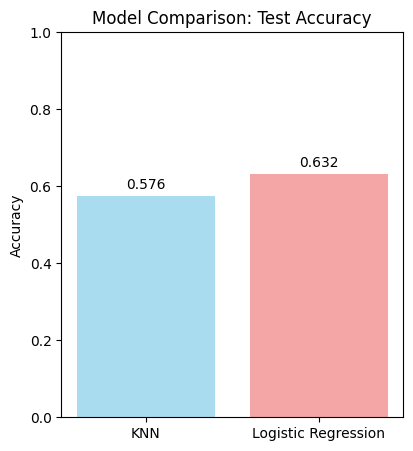

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
models = ['KNN', 'Logistic Regression']
accuracies = [knn_test_accuracy, logreg_test_accuracy]
colors = ['skyblue', 'lightcoral']
bars = plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Model Comparison: Test Accuracy')
plt.ylim(0, 1)
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.3f}', ha='center', va='bottom')

Text(0.5, 23.52222222222222, 'Predicted')

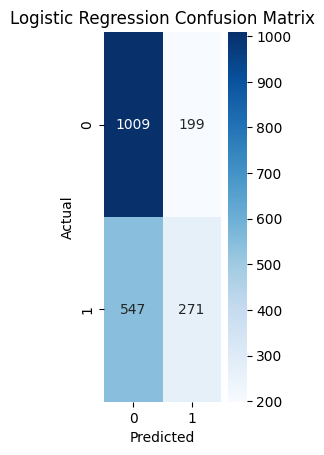

In [ ]:
plt.subplot(1, 3, 2)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

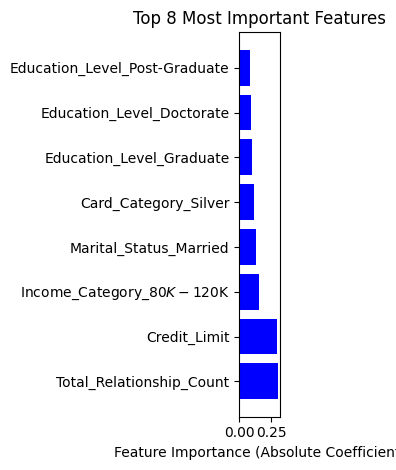

In [ ]:
plt.subplot(1, 3, 3)
top_features = feature_importance.head(8)
plt.barh(top_features['feature'], top_features['importance'], color='blue')
plt.xlabel('Feature Importance (Absolute Coefficient)')
plt.title('Top 8 Most Important Features')
plt.tight_layout()

plt.show()

In [ ]:
print("\n Detailed Performance Metrics")
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

knn_metrics = calculate_metrics(y_test, y_pred, 'KNN')
logreg_metrics = calculate_metrics(y_test, y_pred_logreg, 'Logistic Regression')

metrics_df = pd.DataFrame([knn_metrics, logreg_metrics])
print(metrics_df.round(4))


 Detailed Performance Metrics
                 Model  Accuracy  Precision  Recall  F1-Score
0                  KNN    0.5760     0.4705  0.3998    0.4323
1  Logistic Regression    0.6318     0.5766  0.3313    0.4208


 **We have Concluded that Logistic Regression is a More Suitable model as it performs better on this dataset (it has a higher Accuracy and a higher F1-Score)**